In [825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [826]:
tr=pd.read_csv('train-file.csv')
tr.shape

(614, 13)

In [827]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [828]:
tst=pd.read_csv('test-file.csv')
test=pd.read_csv('test-file.csv')
tst.shape

(367, 12)

In [829]:
tst.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [830]:
tr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [831]:
num=tr.select_dtypes(include= [np.number])
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [832]:
num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [833]:
cat=tr.select_dtypes(include= [np.object])
cat.head()

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_17115/349340173.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat=tr.select_dtypes(include= [np.object])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [834]:
cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_17115/2843763956.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(tr.skew(), color="blue", axlabel= "Skewness")
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

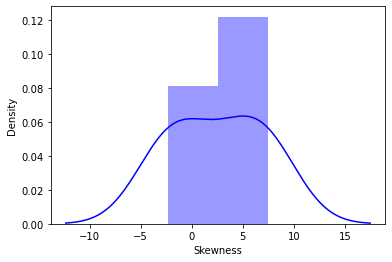

In [835]:
# Skewness plot
sns.distplot(tr.skew(), color="blue", axlabel= "Skewness")

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_17115/1181618918.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(tr.kurt(), color= "r", axlabel="Kurtosis",
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


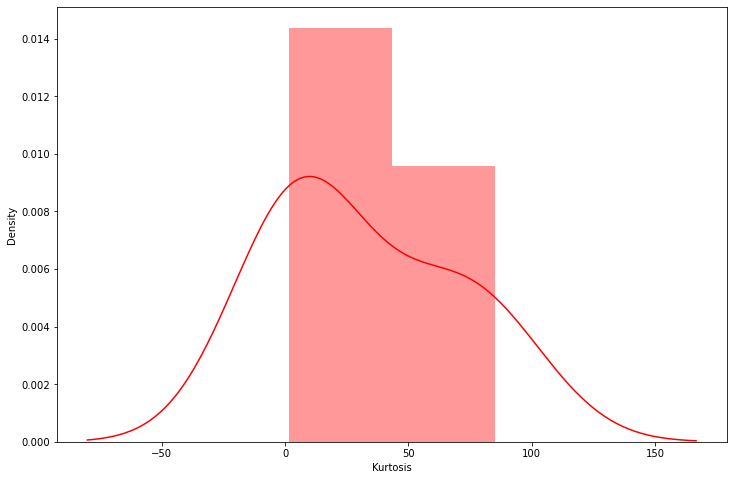

In [836]:
plt.figure(figsize=(12,8))
sns.distplot(tr.kurt(), color= "r", axlabel="Kurtosis",
            norm_hist= False, kde=True, rug= False)

plt.show()

In [837]:
nulltr=tr.isnull().sum()*100/tr.shape[0]
nulltr[nulltr>0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [838]:
nulltst=tst.isnull().sum()*100/tr.shape[0]
nulltst[nulltst>0].sort_values(ascending=False)

Credit_History      4.723127
Self_Employed       3.745928
Gender              1.791531
Dependents          1.628664
Loan_Amount_Term    0.977199
LoanAmount          0.814332
dtype: float64

In [839]:
from sklearn.impute import SimpleImputer

In [840]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
tr[['Credit_History','LoanAmount','Loan_Amount_Term']]=imputer.fit_transform(tr[['Credit_History','LoanAmount','Loan_Amount_Term']])

stimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
tr[['Self_Employed','Dependents','Gender','Married']]=stimp.fit_transform(tr[['Self_Employed','Dependents','Gender','Married']])


In [841]:
nulltr=tr.isnull().sum()*100/tr.shape[0]
nulltr[nulltr>0].sort_values(ascending=False)

Series([], dtype: float64)

In [842]:
tr['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

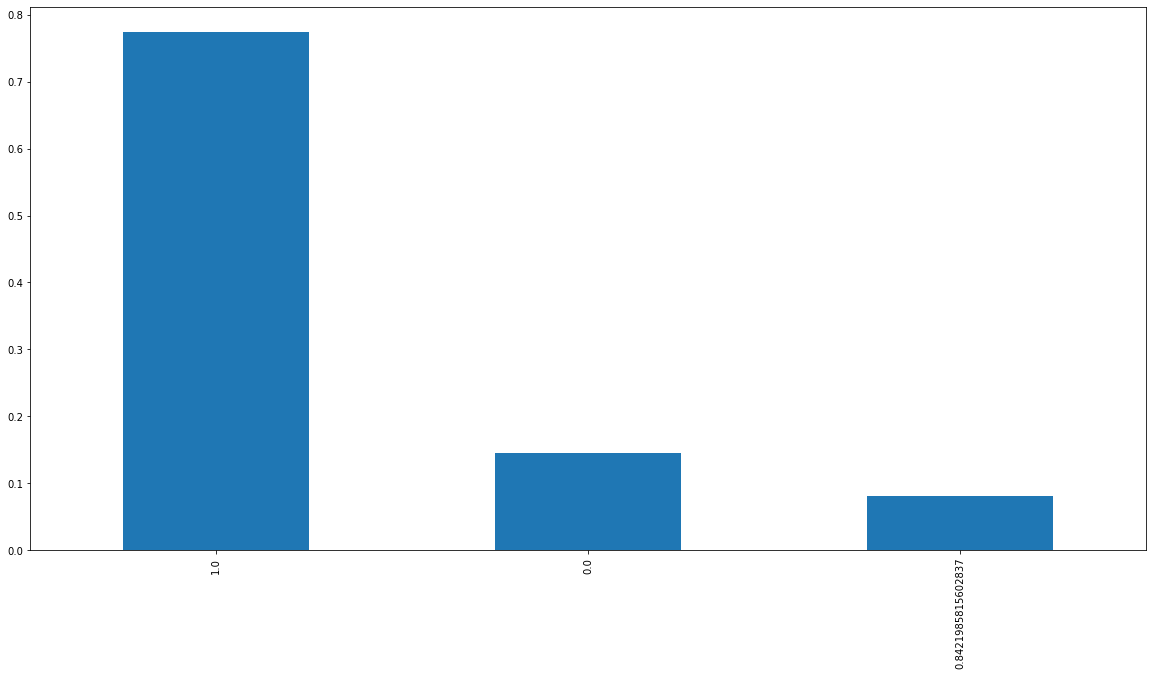

In [843]:
tr['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10))

<AxesSubplot:>

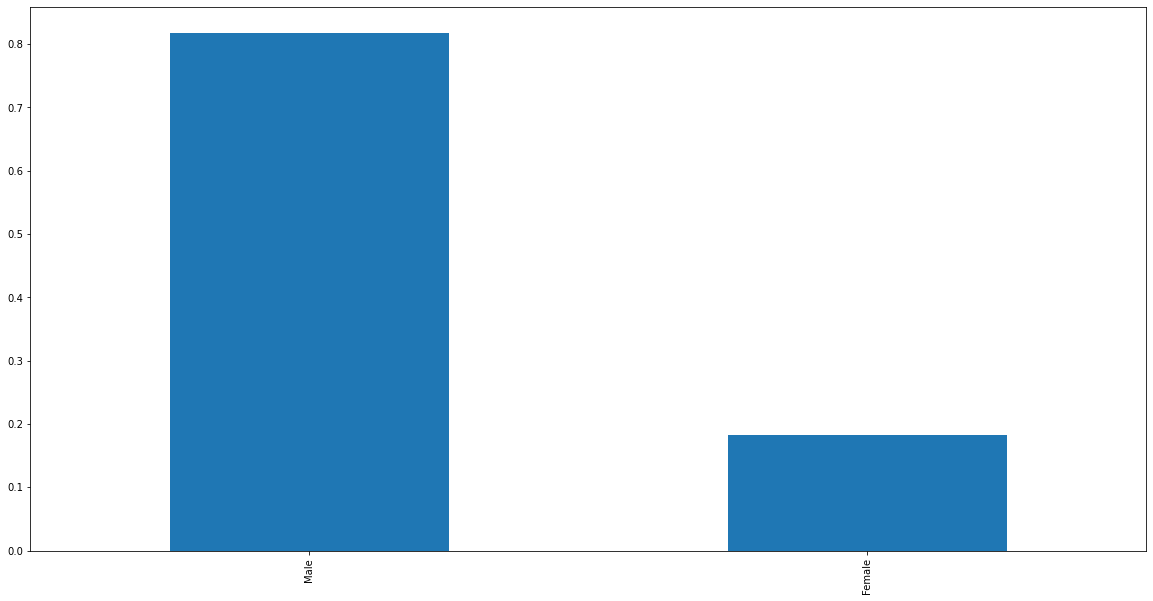

In [844]:
tr['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10))

<AxesSubplot:>

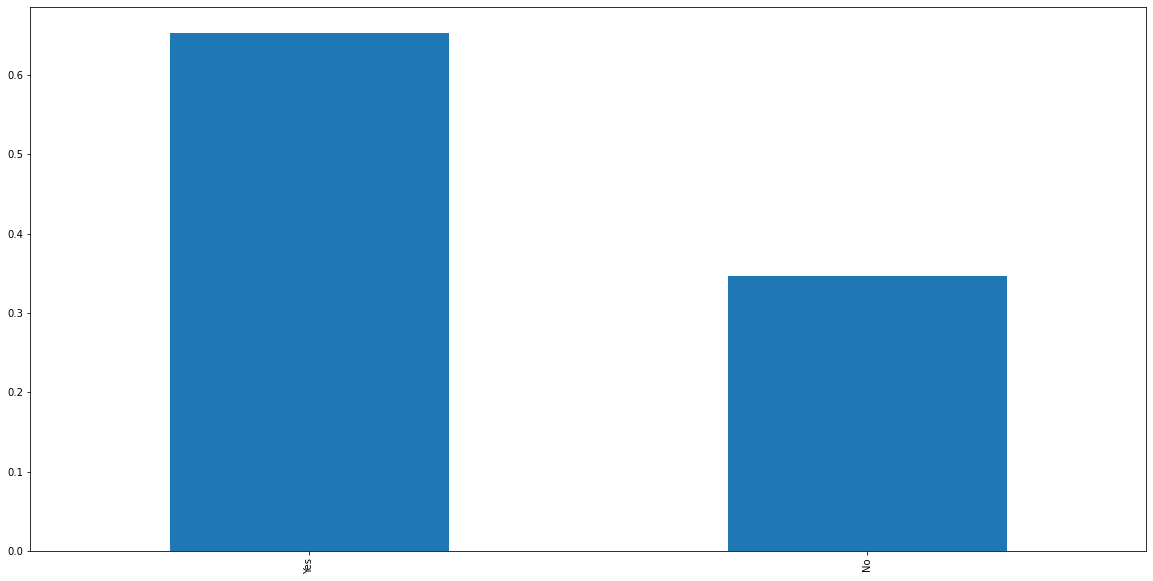

In [845]:
tr['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10))

<AxesSubplot:>

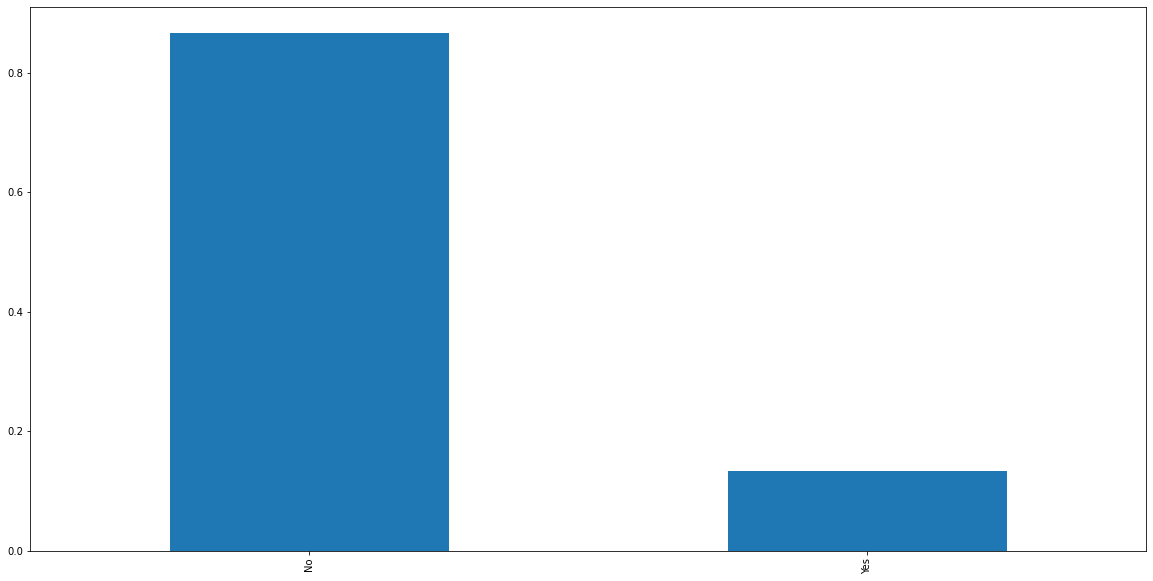

In [846]:
tr['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

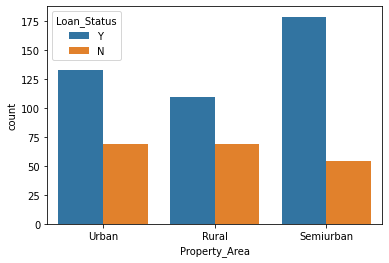

In [847]:
sns.countplot(x=tr['Property_Area'],hue=tr['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

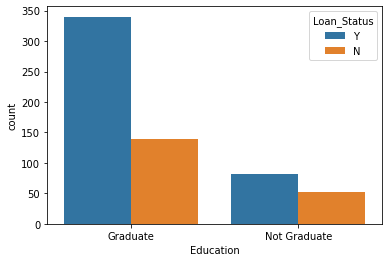

In [848]:
sns.countplot(x=tr['Education'],hue=tr['Loan_Status'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

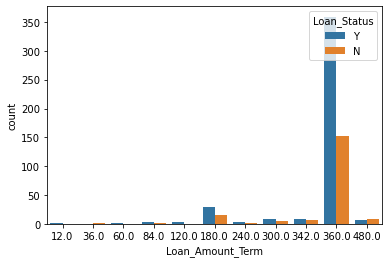

In [849]:
sns.countplot(x=tr['Loan_Amount_Term'],hue=tr['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

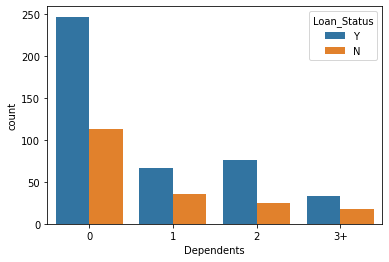

In [850]:
sns.countplot(x=tr['Dependents'],hue=tr['Loan_Status'])

<AxesSubplot:ylabel='ApplicantIncome'>

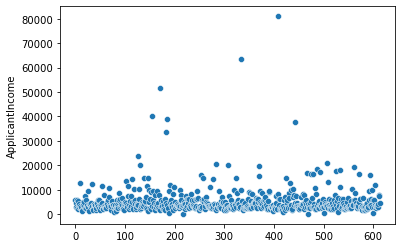

In [851]:
sns.scatterplot(data=tr['ApplicantIncome'])

<AxesSubplot:>

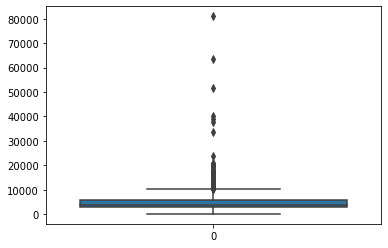

In [852]:
sns.boxplot(data=tr['ApplicantIncome'])

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

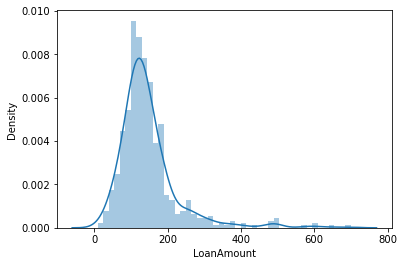

In [853]:
sns.distplot(tr['LoanAmount'])

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

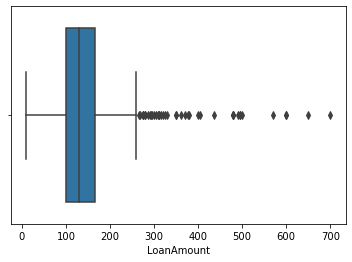

In [854]:
sns.boxplot(tr['LoanAmount'])

In [855]:
tr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [856]:
tr=tr.drop('Loan_ID',axis=1)
tst=tst.drop('Loan_ID',axis=1)

In [857]:
tr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [858]:
tst.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

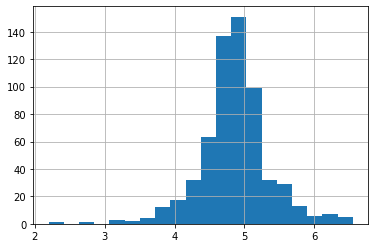

In [859]:
tr['Loanamtupdated'] = np.log(tr['LoanAmount']) 
tr['Loanamtupdated'].hist(bins=20) 
tst['Loanamtupdated'] = np.log(tst['LoanAmount'])

In [860]:
x=tr.drop('Loan_Status',1) 
x

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_17115/219763040.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=tr.drop('Loan_Status',1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loanamtupdated
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,5.231109


In [861]:
y=tr.Loan_Status
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [862]:
x=pd.get_dummies(x) 
tr=pd.get_dummies(tr) 
tst=pd.get_dummies(tst)

In [863]:
from sklearn.model_selection import train_test_split

In [864]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.597,random_state=101)

In [865]:
x_train.shape

(247, 21)

In [866]:
x_test.shape

(367, 21)

In [867]:
y_train.shape

(247,)

In [868]:
y_test.shape

(367,)

In [869]:
from sklearn.linear_model import LogisticRegression

In [870]:
lm=LogisticRegression()

In [871]:
lm.fit(x_train,y_train)

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [872]:
pred=lm.predict(x_test)
pred.shape

(367,)

In [873]:
from sklearn.metrics import classification_report,accuracy_score

In [874]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.68      0.47      0.56       118
           Y       0.78      0.90      0.84       249

    accuracy                           0.76       367
   macro avg       0.73      0.69      0.70       367
weighted avg       0.75      0.76      0.75       367



In [875]:
accuracy_score(y_test,pred)

0.7602179836512262

In [876]:
## Submission File

In [877]:
s=pd.read_csv('sample-submission.csv')

In [878]:
s.shape

(367, 2)

In [879]:
s['Loan_Status']=pred 
s['Loan_ID']=test['Loan_ID']

In [880]:
s['Loan_Status'].replace(0, 'N',inplace=True) 
s['Loan_Status'].replace(1, 'Y',inplace=True)

In [881]:
s.shape
s

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [882]:
sb=pd.read_csv('submission.csv')
sb=sb.loc[:, ~sb.columns.str.contains('^Unnamed')]
sb

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [883]:
pd.DataFrame(sb,columns=['Loan_ID','Loan_Status']).to_csv('subx.csv',index=False)

In [884]:
pd.read_csv('subx.csv')

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,N
